# Analysis of Quantitative Ratings

#### The RE-Pract Survey Research Questions

1. What is the relevance of RE research to practitioners in the industry?
2. What are the most highly rated research ideas?
3. What research problems do practitioners think are most important to be focused on by the RE research community?
4. Do papers with explicit ties to industry have higher practical relevance than other papers?
5. Do practitioners’ perceptions and views differ in dependence on their roles?

#### Our Data Sources

* 435 Paper Summaries with Metadata and Tags

* 154 Respondents with Metadata

* 2164 Paper Ratings

# Setup and Definitions

In [1]:
%run setup.py
%matplotlib inline

## Scores to be used for evaluation

In [2]:
def e_score(x):
    eScore = np.count_nonzero(x == 'Essential') / x.size
    return eScore

def ew_score(x):
    ewScore = (np.count_nonzero(x == 'Essential')+ np.count_nonzero(x == 'Worthwhile'))/ x.size
    return ewScore

def u_score(x):
    uScore = np.count_nonzero(x == 'Unwise') / x.size
    return uScore

# Demographics

### The Respondents

In [3]:
dfdict['truth_metadata'].head(3)


,lfdn,lfdn_original,v_5,v_6,v_11,v_118,v_119,v_120,v_121,v_12,v_14,v_15,v_16,v_19,v_124,v_5_6_integrated,v_15_16_integrated,v_11_coded,v_19_coded
0,0,106,Other (please specify),Researcher,4,not quoted,not quoted,quoted,not quoted,Yes,Small (1-4),Hybrid / mix of embedded systems and informati...,NotAnswered,Automotive,Italy,Researcher,Hybrid / mix of embedded systems and informati...,4.0,Automotive
1,1,131,Developer,NotAnswered,1,quoted,not quoted,not quoted,not quoted,Yes,Medium (5-10),(Business) information systems,NotAnswered,education,Belgium,Developer,(Business) information systems,1.0,Education
2,2,139,Other (please specify),Product Management Coach,10,quoted,quoted,quoted,not quoted,No,Medium (5-10),Other (please specify),Customer facing software products,Wide range (from automotive supplier to insura...,Germany,Coach,Consumer Software,10.0,Multiple Sectors


## Country

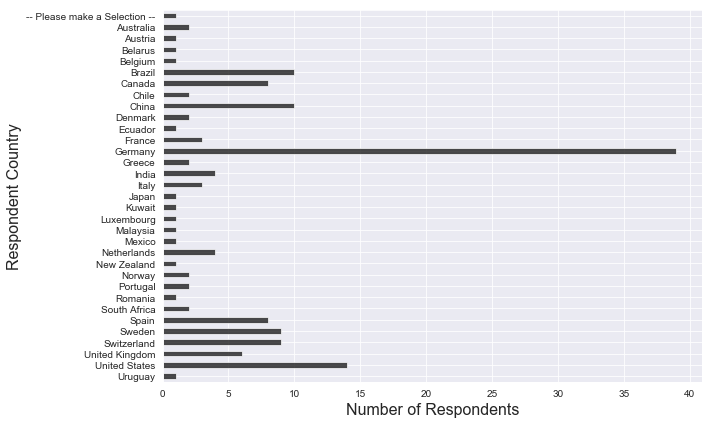

In [4]:
plot_sample(dfdict['truth_metadata'],'v_124', 'Respondent Country')

## Industry Sector

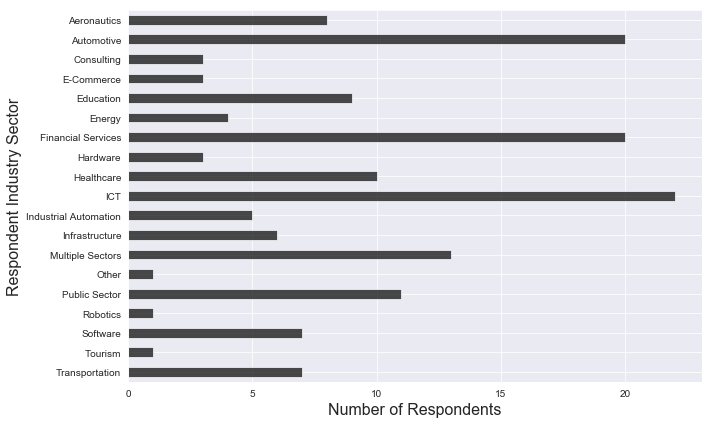

In [5]:
plot_sample(dfdict['truth_metadata'],'v_19_coded', 'Respondent Industry Sector')

## Role

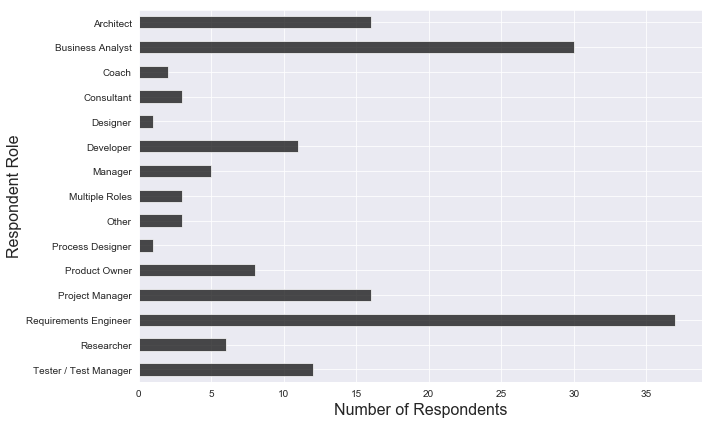

In [6]:
plot_sample(dfdict['truth_metadata'],'v_5_6_integrated', 'Respondent Role')

# Overall Ratings

In [7]:
print('Overall number of ratings: ',len(ratings_with_respondent_meta.index))
ratings_with_respondent_meta.head(3)

Overall number of ratings:  2164


,lfdn,PaperID,rating,lfdn_original,v_5,v_6,v_11,v_118,v_119,v_120,...,v_12,v_14,v_15,v_16,v_19,v_124,v_5_6_integrated,v_15_16_integrated,v_11_coded,v_19_coded
0,2,10,Worthwhile,139,Other (please specify),Product Management Coach,10,quoted,quoted,quoted,...,No,Medium (5-10),Other (please specify),Customer facing software products,Wide range (from automotive supplier to insura...,Germany,Coach,Consumer Software,10.0,Multiple Sectors
1,2,23,Unwise,139,Other (please specify),Product Management Coach,10,quoted,quoted,quoted,...,No,Medium (5-10),Other (please specify),Customer facing software products,Wide range (from automotive supplier to insura...,Germany,Coach,Consumer Software,10.0,Multiple Sectors
2,2,49,Essential,139,Other (please specify),Product Management Coach,10,quoted,quoted,quoted,...,No,Medium (5-10),Other (please specify),Customer facing software products,Wide range (from automotive supplier to insura...,Germany,Coach,Consumer Software,10.0,Multiple Sectors


rating
Unwise           92
Unimportant     548
Worthwhile     1003
Essential       521
Name: lfdn, dtype: int64

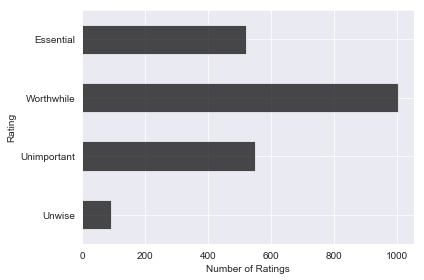

In [8]:
x = ratings_with_respondent_meta.groupby('rating').count(
                            )['lfdn'].sort_index(ascending=False)
x.plot.barh(stacked=False,color='k', alpha=0.7)
plt.ylabel('Rating')
plt.xlabel('Number of Ratings')
plt.tight_layout()
plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = 9, 6
plt.savefig("../plots/overallPerception.pdf")
plt.savefig("../plots/overallPerception.png")
x

## Number of Ratings per Summary

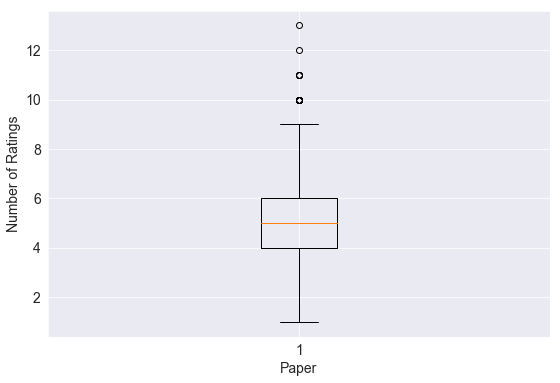

Minimal number of ratings: 1
Maximum number of ratings: 13
Median number of ratings: 5.0


In [9]:
ratings_per_summary = ratings_with_respondent_meta.groupby('PaperID').count()['lfdn']
plt.ylabel('Number of Ratings')
plt.xlabel('Paper')
plt.boxplot(ratings_per_summary)
plt.show()
print ("Minimal number of ratings:",ratings_per_summary.min())
print ("Maximum number of ratings:",ratings_per_summary.max())
print ("Median number of ratings:",ratings_per_summary.median())

## Number of Responses and Ratings per Respondent

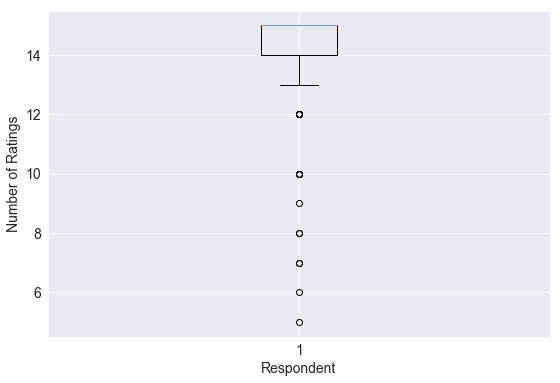

Minimal number of ratings: 5
Maximum number of ratings: 15
Median number of ratings: 15.0
Distribribution of number of ratings per respondent:


15    113
14     20
12      5
10      4
13      3
8       2
7       2
9       1
6       1
5       1
Name: rating, dtype: int64

In [10]:
ratings_per_respondent = ratings_with_respondent_meta.groupby('lfdn').count()['rating']
plt.ylabel('Number of Ratings')
plt.xlabel('Respondent')
plt.boxplot(ratings_per_respondent)
plt.show()
print ("Minimal number of ratings:",ratings_per_respondent.min())
print ("Maximum number of ratings:",ratings_per_respondent.max())
print ("Median number of ratings:",ratings_per_respondent.median())
print ("Distribribution of number of ratings per respondent:")
ratings_per_respondent.value_counts()

## Distribution of ratings per respondent

In [11]:
#%load_ext rpy2.ipython

In [12]:
#%%R -i ratings_with_respondent_meta
# some Jupyter notebook magic is needed touse calcualtion of Fleiss in R within Python
# import ratings_with_respondent_meta from global environment

#install.packages("irr", quiet=TRUE)
#library(irr)

#kappam.fleiss(ratings_with_respondent_meta)


# Ratings Grouped by Respondent Metadata

## Respondent Role

In [13]:
ratings_with_respondent_meta.head(3)

,lfdn,PaperID,rating,lfdn_original,v_5,v_6,v_11,v_118,v_119,v_120,...,v_12,v_14,v_15,v_16,v_19,v_124,v_5_6_integrated,v_15_16_integrated,v_11_coded,v_19_coded
0,2,10,Worthwhile,139,Other (please specify),Product Management Coach,10,quoted,quoted,quoted,...,No,Medium (5-10),Other (please specify),Customer facing software products,Wide range (from automotive supplier to insura...,Germany,Coach,Consumer Software,10.0,Multiple Sectors
1,2,23,Unwise,139,Other (please specify),Product Management Coach,10,quoted,quoted,quoted,...,No,Medium (5-10),Other (please specify),Customer facing software products,Wide range (from automotive supplier to insura...,Germany,Coach,Consumer Software,10.0,Multiple Sectors
2,2,49,Essential,139,Other (please specify),Product Management Coach,10,quoted,quoted,quoted,...,No,Medium (5-10),Other (please specify),Customer facing software products,Wide range (from automotive supplier to insura...,Germany,Coach,Consumer Software,10.0,Multiple Sectors


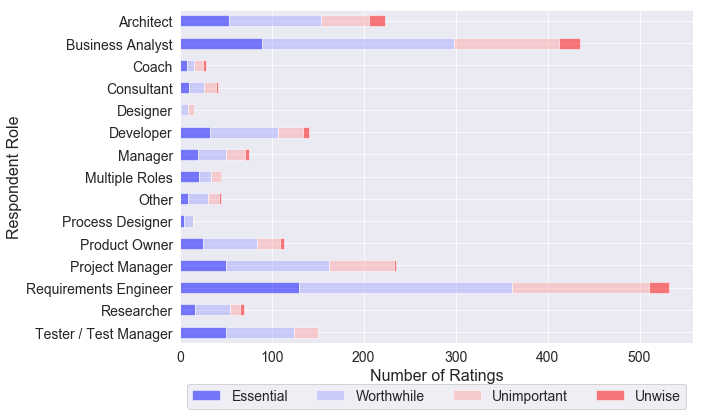

In [14]:
plot_df(ratings_with_respondent_meta, 'v_5_6_integrated', 'Respondent Role', absolute=True)

rating,Essential,Worthwhile,Unimportant,Unwise
v_5_6_integrated,,,,
Tester / Test Manager,50,74,26,0
Researcher,17,38,11,4
Requirements Engineer,130,231,149,22
Project Manager,50,112,71,2
Product Owner,25,59,25,4
Process Designer,5,9,1,0
Other,9,22,12,2
Multiple Roles,21,13,10,1
Manager,20,30,21,4


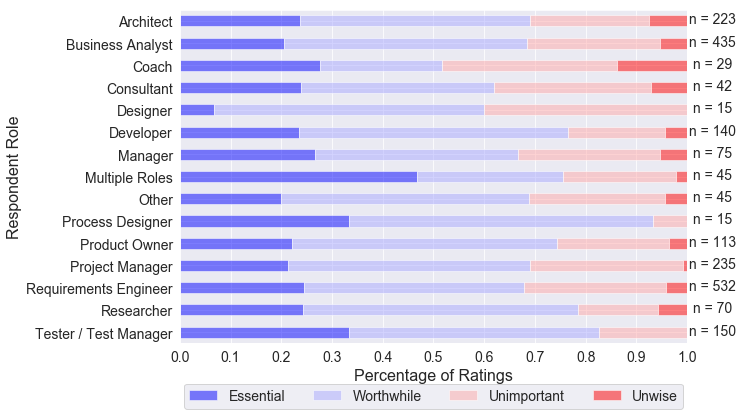

In [15]:
plot_df(ratings_with_respondent_meta, 'v_5_6_integrated', 'Respondent Role', absolute=False)

## Respondent Country

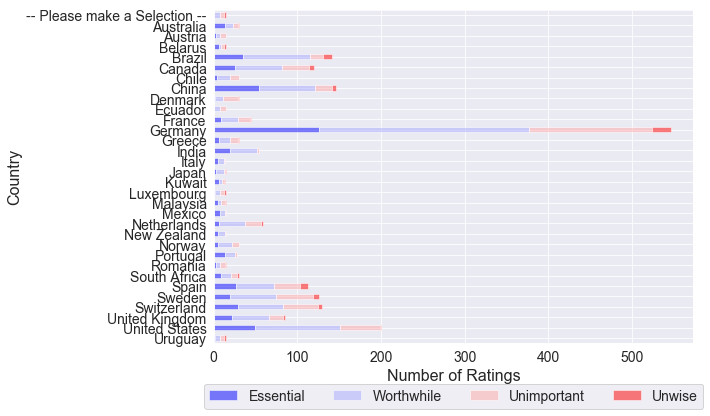

In [16]:
plot_df(ratings_with_respondent_meta, 'v_124', 'Country', absolute=True)

rating,Essential,Worthwhile,Unimportant,Unwise
v_124,,,,
Uruguay,2,5,5,3
United States,49,102,48,1
United Kingdom,22,44,17,2
Switzerland,29,54,42,4
Sweden,19,55,45,7
Spain,27,45,31,10
South Africa,9,12,7,2
Romania,3,4,7,1
Portugal,13,12,3,0


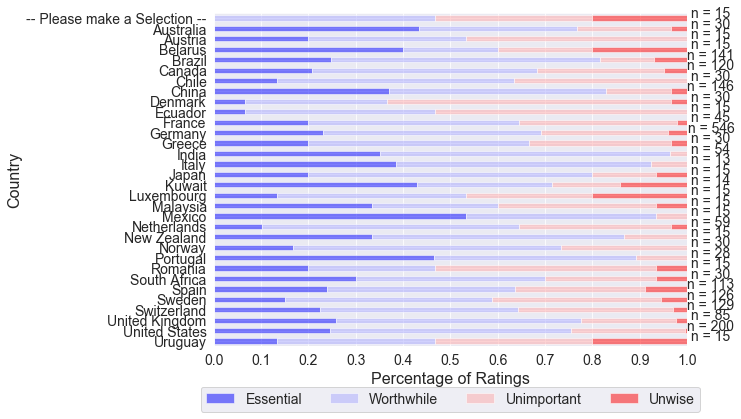

In [17]:
plot_df(ratings_with_respondent_meta, 'v_124', 'Country', absolute=False)

# Ratings Grouped by Paper Metadata

In [18]:
ratings_meta = dfdict['paper_metadata'].merge(dfdict['truth_ratings'], on='PaperID')
ratings_meta.head(3)

,PaperID,Title,Authors,Venue,Year,NumberOfPages,AcadVsInd,IndTrack,Summary,lfdn,rating
0,1,Software traceability with topic modeling,"Hazeline U. Asuncion, Arthur U. Asuncion, Rich...",ICSE,2010,10,Academic,No,A method for automatically recovering software...,16,Worthwhile
1,1,Software traceability with topic modeling,"Hazeline U. Asuncion, Arthur U. Asuncion, Rich...",ICSE,2010,10,Academic,No,A method for automatically recovering software...,52,Essential
2,1,Software traceability with topic modeling,"Hazeline U. Asuncion, Arthur U. Asuncion, Rich...",ICSE,2010,10,Academic,No,A method for automatically recovering software...,96,Worthwhile


## Venue

rating,Essential,Worthwhile,Unimportant,Unwise
Venue,,,,
REFSQ,146,265,113,16
RE,284,579,318,56
ICSE,52,81,54,8
ESEM,21,52,41,7
ESEC/FSE,18,26,22,5


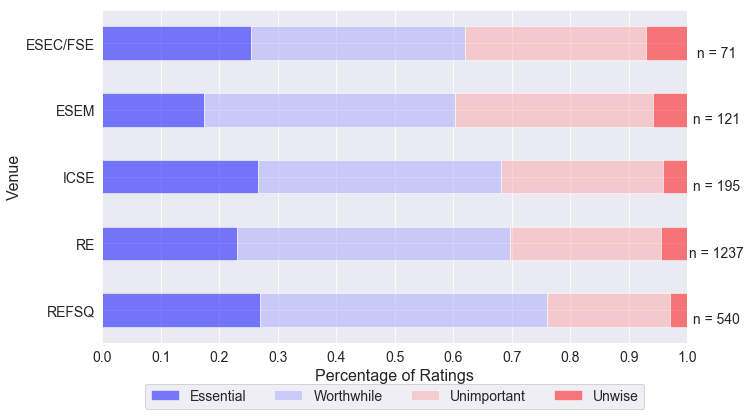

In [19]:
ratings_meta['Venue'] = ratings_meta['Venue'].replace("FSE","ESEC/FSE")
plot_df(ratings_meta, 'Venue', 'Venue', absolute=False)
plt.savefig("../plots/venues.pdf")

In [20]:
scores_venue=ratings_meta.groupby(['Venue'])['rating'].agg([np.size,e_score,ew_score,u_score])
scores_venue

,size,e_score,ew_score,u_score
Venue,,,,
ESEC/FSE,71,0.253521,0.619718,0.070423
ESEM,121,0.173554,0.603306,0.057851
ICSE,195,0.266667,0.682051,0.041026
RE,1237,0.229588,0.697656,0.045271
REFSQ,540,0.270370,0.761111,0.029630


Aggregate scores by RE specific venues (RE and REFSQ) and rest

In [21]:
df = ratings_meta.set_index('Venue')
mapping = {'ESEC/FSE': 'Other', 'ESEM': 'Other','ICSE': 'Other','RE': 'RE-Venue','REFSQ': 'RE-Venue'}
score_REvenues=df.groupby([mapping])['rating'].agg([np.size,e_score,ew_score,u_score])
score_REvenues

,size,e_score,ew_score,u_score
Other,387,0.235142,0.645995,0.051680
RE-Venue,1777,0.241981,0.716939,0.040518


## Year

rating,Essential,Worthwhile,Unimportant,Unwise
Year,,,,
2016,74,150,101,16
2015,56,111,69,9
2014,82,166,99,18
2013,94,152,95,17
2012,60,142,62,10
2011,69,125,58,10
2010,86,157,64,12


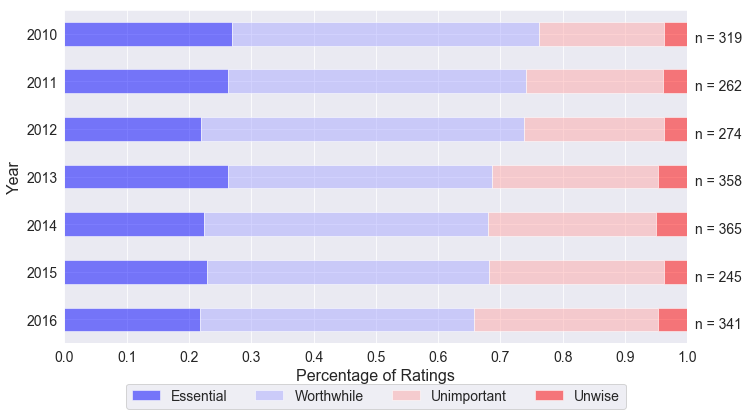

In [22]:
plot_df(ratings_meta, 'Year', 'Year', absolute=False)
plt.savefig("../plots/years.pdf")

In [23]:
scores_year=ratings_meta.groupby(['Year'])['rating'].agg([np.size,e_score,ew_score,u_score])
scores_year

,size,e_score,ew_score,u_score
Year,,,,
2010,319,0.269592,0.761755,0.037618
2011,262,0.263359,0.740458,0.038168
2012,274,0.218978,0.737226,0.036496
2013,358,0.262570,0.687151,0.047486
2014,365,0.224658,0.679452,0.049315
2015,245,0.228571,0.681633,0.036735
2016,341,0.217009,0.656891,0.046921


## Author Affiliations and Conference Tracks

rating,Essential,Worthwhile,Unimportant,Unwise
AcadVsInd,,,,
Mixed,98,204,88,15
Industry,50,74,36,8
Academic,373,725,424,69


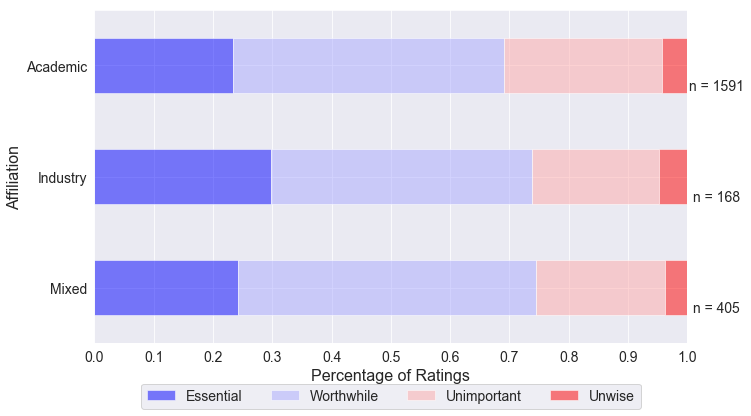

In [24]:
plot_df(ratings_meta, 'AcadVsInd', 'Affiliation', absolute=False)

rating,Essential,Worthwhile,Unimportant,Unwise
IndTrack,,,,
Yes,125,201,99,17
No,396,802,449,75


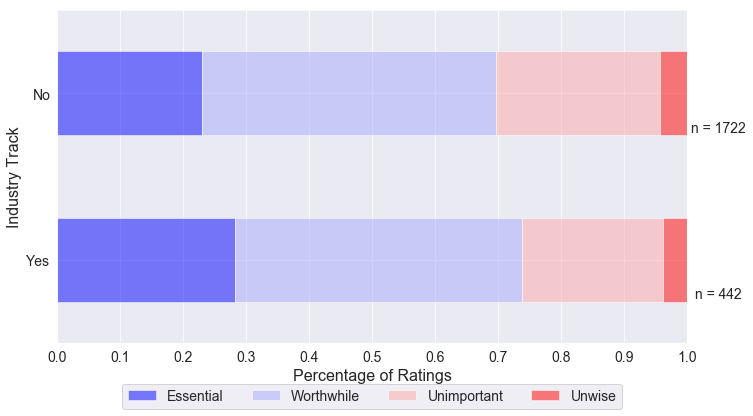

In [25]:
plot_df(ratings_meta, 'IndTrack', 'Industry Track', absolute=False)

rating              Essential  Worthwhile  Unimportant  Unwise
AcadVsInd IndTrack                                            
Mixed     Yes              46         103           45       6
          No               52         101           43       9
Industry  Yes              45          59           28       7
          No                5          15            8       1
Academic  Yes              34          39           26       4
          No              339         686          398      65

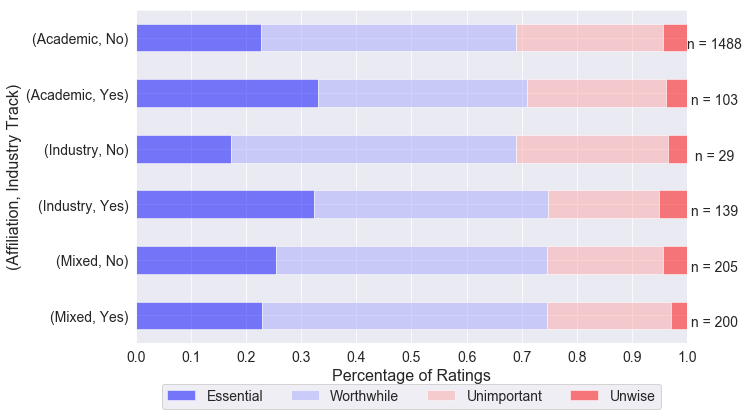

In [26]:
plot_df(ratings_meta, ['AcadVsInd','IndTrack'], '(Affiliation, Industry Track)', absolute=False)
plt.savefig("../plots/ind_vs_academic.pdf")

# Ratings Grouped by Paper Tags

In [27]:
ratings_methodtags = papertags_method.merge(dfdict['truth_ratings'], on='PaperID')
ratings_methodtags.head(1)

,PaperID,PaperSummary,Tag,level_1,level_2,level_3,lfdn,rating
0,1,A method for automatically recovering software...,how:engineering:methodology,how,engineering,methodology,16,Worthwhile


In [28]:
ratings_contenttags = papertags_content.merge(dfdict['truth_ratings'], on='PaperID')
ratings_contenttags.head(1)

,PaperID,PaperSummary,Tag,level_1,level_2,level_3,level_4,lfdn,rating
0,1,A method for automatically recovering software...,what:challenge:content_traceability,what,challenge,content,traceability,16,Worthwhile


## Ratings Grouped by Research Method

rating                     Essential  Worthwhile  Unimportant  Unwise
level_2     level_3                                                  
perspective philosophy             1           3            1       1
engineering reference             10          11            4       1
perspective opinion                8          22           14       1
            review                12          30           23       3
engineering technology            28          70           49       7
science     intervention          19          96           69      13
perspective experience            30          89           56       7
science     interrogation         70         103           53       7
            observation          102         185           90      14
engineering methodology          244         403          200      38


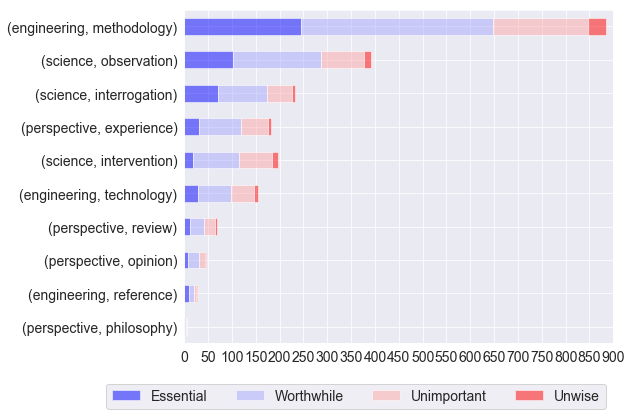

In [29]:
plot_tag_ratings(
    tag_stats(ratings_methodtags, all_levels[:-1], totals=True, rel=False).loc['how'], 
    sort_values=True, rel=False, step=50)

rating                     Essential  Worthwhile  Unimportant    Unwise
level_2     level_3                                                    
science     intervention    0.096447    0.487310     0.350254  0.065990
perspective review          0.176471    0.441176     0.338235  0.044118
engineering technology      0.181818    0.454545     0.318182  0.045455
perspective experience      0.164835    0.489011     0.307692  0.038462
            philosophy      0.166667    0.500000     0.166667  0.166667
            opinion         0.177778    0.488889     0.311111  0.022222
engineering methodology     0.275706    0.455367     0.225989  0.042938
science     observation     0.260870    0.473146     0.230179  0.035806
            interrogation   0.300429    0.442060     0.227468  0.030043
engineering reference       0.384615    0.423077     0.153846  0.038462


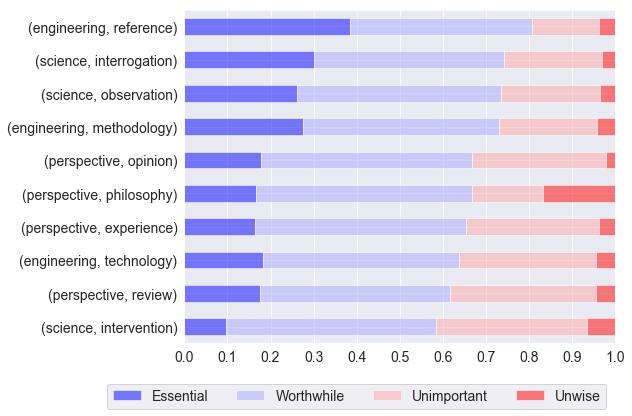

In [30]:
plot_tag_ratings(
    tag_stats(ratings_methodtags, all_levels[:-1], totals=True, rel=True).loc['how'], 
    sort_values=True, rel=True)

## Ratings Grouped by Evaluation Subjects

rating                       Essential  Worthwhile  Unimportant  Unwise
level_2       level_3                                                  
laypeople     others                 0           0            1       0
professionals academics              1           4            2       3
laypeople     students              13          75           57       9
professionals practitioners         53          76           32       2


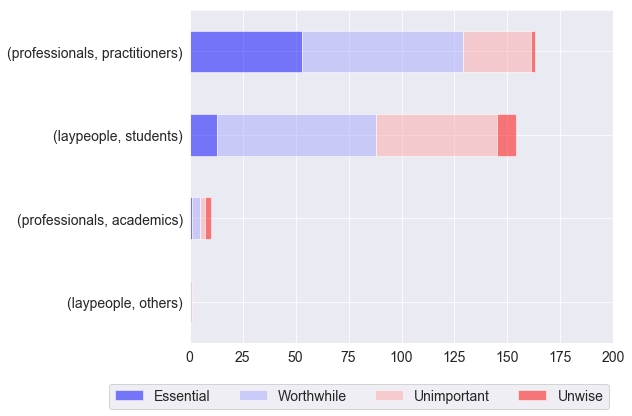

In [31]:
plot_tag_ratings(
    tag_stats(ratings_methodtags, all_levels[:-1], totals=True, rel=False).loc['withwhom'], 
    sort_values=True, rel=False)

rating                       Essential  Worthwhile  Unimportant    Unwise
level_2       level_3                                                    
laypeople     others          0.000000    0.000000     1.000000  0.000000
professionals academics       0.100000    0.400000     0.200000  0.300000
laypeople     students        0.084416    0.487013     0.370130  0.058442
professionals practitioners   0.325153    0.466258     0.196319  0.012270


<Figure size 288x144 with 0 Axes>

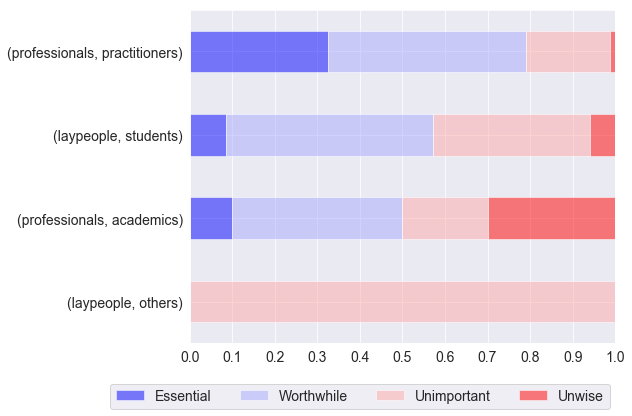

In [52]:
%run setup.py

plot_tag_ratings(
    tag_stats(ratings_methodtags, all_levels[:-1], totals=True, rel=True).loc['withwhom'], 
    sort_values=True, rel=True)
plt.savefig("../plots/students_vs_professionals.pdf")

## Ratings Grouped by Documentation Style

In [33]:
data = dfdict['papertags_what-manual_final']
data.rename(columns={data.columns[0]:'PaperID'}, inplace=True)
data.head(3)

,PaperID,summary,quality,people,process,documentation,SM_first,SM_second,SM_third,phase
0,1,A method for automatically recovering software...,traceability,NaN,automation,general,NaN,NaN,NaN,NaN
1,2,A set of two techniques for improving the qual...,traceability,NaN,quality assurance,NaN,NaN,NaN,NaN,NaN
2,3,A case study on evaluating a given technique f...,NaN,NaN,prioritization,NaN,NaN,NaN,NaN,elicitation


In [34]:
reshaped = \
(data.set_index(data.columns.drop('documentation',1).tolist())
   .documentation.str.split(',', expand=True)
   .stack()
   .reset_index()
   .rename(columns={0:'documentation'})
   .loc[:, data.columns]
)

reshaped.head(5)

,PaperID,summary,quality,people,process,documentation,SM_first,SM_second,SM_third,phase
0,1,A method for automatically recovering software...,traceability,NaN,automation,general,NaN,NaN,NaN,NaN
1,4,An experience report on the development of a m...,NaN,NaN,formalization,general,NaN,NaN,NaN,validation and verification
2,5,A document-driven study on the relevancy of cl...,NaN,NaN,quality assurance,general,NaN,NaN,NaN,NaN
3,9,A tool for automating ambiguity detection and ...,unambiguousness,NaN,automation,natural language,NaN,NaN,NaN,NaN
4,11,A method for developing scenarios at multiple ...,consistency,NaN,NaN,scenarios,NaN,NaN,NaN,validation and verification


rating,Essential,Worthwhile,Unimportant,Unwise
documentation,,,,
user story,6,6,6,0
use case,13,26,8,6
uml diagram,0,3,1,0
state machine,1,1,2,0
scenarios,10,11,4,1
rules,1,1,1,0
review report,24,26,22,4
other,13,13,10,2
natural language,37,87,59,10


,lfdn,PaperID,summary,quality,people,process,documentation,SM_first,SM_second,SM_third,phase
rating,,,,,,,,,,,
Essential,134,134,134,51,2,66,134,21,12,7,44
Worthwhile,261,261,261,81,13,150,261,48,23,8,67
Unimportant,152,152,152,51,8,85,152,22,7,4,32
Unwise,31,31,31,3,1,21,31,6,4,2,7


<Figure size 288x144 with 0 Axes>

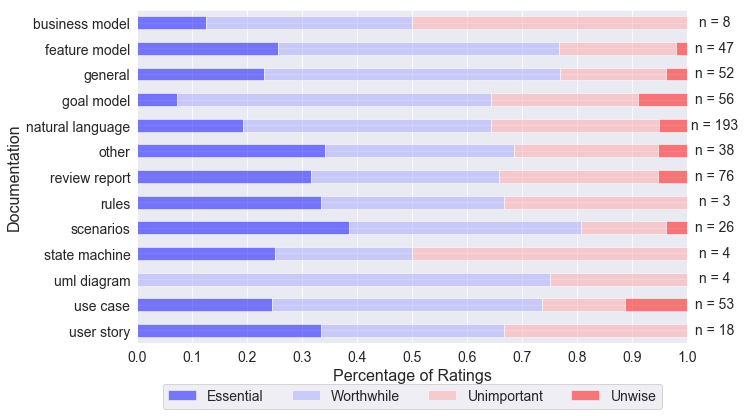

In [35]:
%run setup.py

ratings_with_tags = dfdict['truth_ratings'].merge(reshaped, how='inner')

plot_df(ratings_with_tags, 'documentation', 'Documentation', absolute=False)
plt.rcParams['figure.figsize'] = 9, 9
plt.savefig("../plots/content.pdf")

#Calculate scores
scores_doc=ratings_with_tags.groupby(['documentation'])['rating'].agg([np.size,e_score,ew_score,u_score])
scores_doc["category"]="documentation"

ratings_with_tags.groupby('rating').count()

In [36]:
papercount_doc=ratings_with_tags.groupby(['documentation'])['PaperID'].nunique()

#join both tables
stats_doc=scores_doc.merge(pd.DataFrame(papercount_doc), left_index=True, right_index=True).rename(columns={'PaperID':'nr_Papers'})
stats_doc

,size,e_score,ew_score,u_score,category,nr_Papers
documentation,,,,,,
business model,8,0.125000,0.500000,0.000000,documentation,1
feature model,47,0.255319,0.765957,0.021277,documentation,7
general,52,0.230769,0.769231,0.038462,documentation,13
goal model,56,0.071429,0.642857,0.089286,documentation,11
natural language,193,0.191710,0.642487,0.051813,documentation,37
other,38,0.342105,0.684211,0.052632,documentation,10
review report,76,0.315789,0.657895,0.052632,documentation,12
rules,3,0.333333,0.666667,0.000000,documentation,1
scenarios,26,0.384615,0.807692,0.038462,documentation,5


## Ratings based on People aspects

In [37]:
data = dfdict['papertags_what-manual_final']
data.rename(columns={data.columns[0]:'PaperID'}, inplace=True)

reshaped = \
(data.set_index(data.columns.drop('people',1).tolist())
   .people.str.split(',', expand=True)
   .stack()
   .reset_index()
   .rename(columns={0:'people'})
   .loc[:, data.columns]
)

reshaped.head(5)

,PaperID,summary,quality,people,process,documentation,SM_first,SM_second,SM_third,phase
0,16,An experiment with students on the effectivene...,NaN,creativity,NaN,NaN,NaN,NaN,NaN,elicitation
1,20,A method for building domain ontologies suitab...,understandability,subjectivity,NaN,NaN,NaN,NaN,NaN,elicitation
2,23,A method for systematically and repeatedly exc...,NaN,collaboration,NaN,NaN,NaN,NaN,NaN,NaN
3,27,A method for assessing the completeness of spe...,completeness,subjectivity,quality assurance,NaN,NaN,NaN,NaN,NaN
4,29,An experience report on the development of a s...,NaN,communication,modeling,NaN,NaN,NaN,NaN,NaN


rating,Essential,Worthwhile,Unimportant,Unwise
people,,,,
subjectivity,8,6,4,1
skills,12,44,29,6
other,4,13,8,2
creativity,7,21,12,4
communication,17,31,20,2
collaboration,28,35,16,4


,lfdn,PaperID,summary,quality,people,process,documentation,SM_first,SM_second,SM_third,phase
rating,,,,,,,,,,,
Essential,76,76,76,9,76,13,2,10,7,4,20
Worthwhile,150,150,150,22,150,41,12,15,12,9,42
Unimportant,89,89,89,15,89,24,7,16,13,11,25
Unwise,19,19,19,1,19,1,1,4,3,2,6


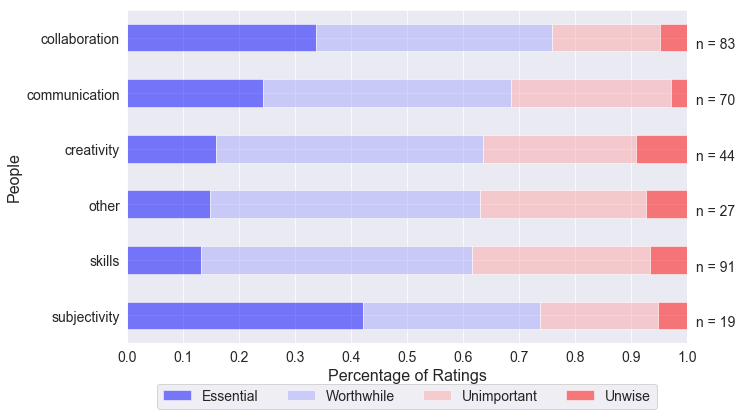

In [38]:
ratings_with_tags = dfdict['truth_ratings'].merge(reshaped, how='inner')
plot_df(ratings_with_tags, 'people', 'People', absolute=False)
plt.rcParams['figure.figsize'] = 9, 9
plt.savefig("../plots/content_people.pdf")

#Calculate scores
scores_people=ratings_with_tags.groupby(['people'])['rating'].agg([np.size,e_score,ew_score,u_score])
scores_people["category"]="people"

ratings_with_tags.groupby('rating').count()

In [39]:
papercount_people=ratings_with_tags.groupby(['people'])['PaperID'].nunique()

#join both tables
stats_people=scores_people.merge(pd.DataFrame(papercount_people), left_index=True, right_index=True).rename(columns={'PaperID':'nr_Papers'})
stats_people

,size,e_score,ew_score,u_score,category,nr_Papers
people,,,,,,
collaboration,83,0.337349,0.759036,0.048193,people,15
communication,70,0.242857,0.685714,0.028571,people,13
creativity,44,0.159091,0.636364,0.090909,people,7
other,27,0.148148,0.629630,0.074074,people,5
skills,91,0.131868,0.615385,0.065934,people,19
subjectivity,19,0.421053,0.736842,0.052632,people,4


## Ratings based on Quality

In [40]:
data = dfdict['papertags_what-manual_final']
data.rename(columns={data.columns[0]:'PaperID'}, inplace=True)

reshaped = \
(data.set_index(data.columns.drop('quality',1).tolist())
   .quality.str.split(',', expand=True)
   .stack()
   .reset_index()
   .rename(columns={0:'quality'})
   .loc[:, data.columns]
)

reshaped.head(5)

,PaperID,summary,quality,people,process,documentation,SM_first,SM_second,SM_third,phase
0,1,A method for automatically recovering software...,traceability,NaN,automation,general,NaN,NaN,NaN,NaN
1,2,A set of two techniques for improving the qual...,traceability,NaN,quality assurance,NaN,NaN,NaN,NaN,NaN
2,6,A case study on the effects of a highly ambigu...,unambiguousness,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,A tool for automating ambiguity detection and ...,unambiguousness,NaN,automation,natural language,NaN,NaN,NaN,NaN
4,11,A method for developing scenarios at multiple ...,consistency,NaN,NaN,scenarios,NaN,NaN,NaN,validation and verification


rating,Essential,Worthwhile,Unimportant,Unwise
quality,,,,
verifiability,2,2,1,0
understandability,14,32,16,3
uncertainty,11,27,15,2
unambiguousness,19,27,19,0
traceability,58,86,60,6
other,5,5,3,1
necessity,2,6,1,1
general,16,17,4,0
feasibility,2,1,5,0


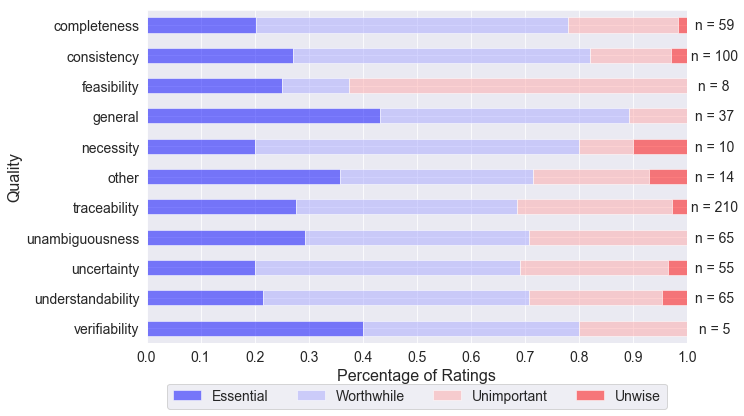

In [41]:
ratings_with_tags = dfdict['truth_ratings'].merge(reshaped, how='inner')
plot_df(ratings_with_tags, 'quality', 'Quality', absolute=False)
plt.rcParams['figure.figsize'] = 9, 9
plt.savefig("../plots/content_quality.pdf")

#Calculate scores
scores_quality=ratings_with_tags.groupby(['quality'])['rating'].agg([np.size,e_score,ew_score,u_score])
scores_quality["category"]="quality"

In [42]:
papercount_quality=ratings_with_tags.groupby(['quality'])['PaperID'].nunique()

#join both tables
stats_quality=scores_quality.merge(pd.DataFrame(papercount_quality), left_index=True, right_index=True).rename(columns={'PaperID':'nr_Papers'})
stats_quality

,size,e_score,ew_score,u_score,category,nr_Papers
quality,,,,,,
completeness,59,0.203390,0.779661,0.016949,quality,11
consistency,100,0.270000,0.820000,0.030000,quality,18
feasibility,8,0.250000,0.375000,0.000000,quality,2
general,37,0.432432,0.891892,0.000000,quality,8
necessity,10,0.200000,0.800000,0.100000,quality,3
other,14,0.357143,0.714286,0.071429,quality,3
traceability,210,0.276190,0.685714,0.028571,quality,40
unambiguousness,65,0.292308,0.707692,0.000000,quality,14
uncertainty,55,0.200000,0.690909,0.036364,quality,11


## Rating based on Phase

In [43]:
data = dfdict['papertags_what-manual_final']
data.rename(columns={data.columns[0]:'PaperID'}, inplace=True)

reshaped = \
(data.set_index(data.columns.drop('phase',1).tolist())
   .phase.str.split(',', expand=True)
   .stack()
   .reset_index()
   .rename(columns={0:'phase'})
   .loc[:, data.columns]
)

reshaped.head(5)

,PaperID,summary,quality,people,process,documentation,SM_first,SM_second,SM_third,phase
0,3,A case study on evaluating a given technique f...,NaN,NaN,prioritization,NaN,NaN,NaN,NaN,elicitation
1,4,An experience report on the development of a m...,NaN,NaN,formalization,general,NaN,NaN,NaN,validation and verification
2,8,An interview-based study with practitioners fo...,NaN,NaN,quality assurance,NaN,process,NaN,NaN,validation and verification
3,11,A method for developing scenarios at multiple ...,consistency,NaN,NaN,scenarios,NaN,NaN,NaN,validation and verification
4,16,An experiment with students on the effectivene...,NaN,creativity,NaN,NaN,NaN,NaN,NaN,elicitation


rating,Essential,Worthwhile,Unimportant,Unwise
phase,,,,
validation and verification,73,106,48,11
negotiation,3,12,2,2
management,23,40,23,6
elicitation,63,148,76,12
documentation,30,68,30,2


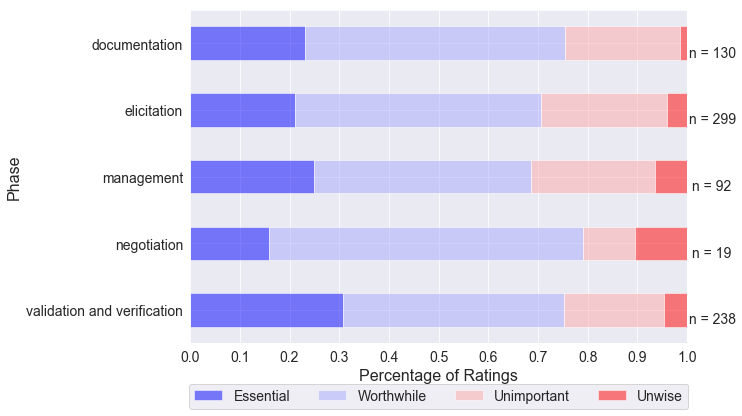

In [44]:
ratings_with_tags = dfdict['truth_ratings'].merge(reshaped, how='inner')
plot_df(ratings_with_tags, 'phase', 'Phase', absolute=False)
plt.rcParams['figure.figsize'] = 9, 9
plt.savefig("../plots/content_phase.pdf")

#Calculate scores
scores_phase=ratings_with_tags.groupby(['phase'])['rating'].agg([np.size,e_score,ew_score,u_score])
scores_phase["category"]="phase"

In [45]:
papercount_phase=ratings_with_tags.groupby(['phase'])['PaperID'].nunique()

#join both tables
stats_phase=scores_phase.merge(pd.DataFrame(papercount_phase), left_index=True, right_index=True).rename(columns={'PaperID':'nr_Papers'})
stats_phase

,size,e_score,ew_score,u_score,category,nr_Papers
phase,,,,,,
documentation,130,0.230769,0.753846,0.015385,phase,24
elicitation,299,0.210702,0.705686,0.040134,phase,61
management,92,0.250000,0.684783,0.065217,phase,17
negotiation,19,0.157895,0.789474,0.105263,phase,4
validation and verification,238,0.306723,0.752101,0.046218,phase,44


## Ratings based on Process

In [46]:
data = dfdict['papertags_what-manual_final']
data.rename(columns={data.columns[0]:'PaperID'}, inplace=True)

reshaped = \
(data.set_index(data.columns.drop('process',1).tolist())
   .process.str.split(',', expand=True)
   .stack()
   .reset_index()
   .rename(columns={0:'process'})
   .loc[:, data.columns]
)

reshaped.head(5)

,PaperID,summary,quality,people,process,documentation,SM_first,SM_second,SM_third,phase
0,1,A method for automatically recovering software...,traceability,NaN,automation,general,NaN,NaN,NaN,NaN
1,2,A set of two techniques for improving the qual...,traceability,NaN,quality assurance,NaN,NaN,NaN,NaN,NaN
2,3,A case study on evaluating a given technique f...,NaN,NaN,prioritization,NaN,NaN,NaN,NaN,elicitation
3,4,An experience report on the development of a m...,NaN,NaN,formalization,general,NaN,NaN,NaN,validation and verification
4,5,A document-driven study on the relevancy of cl...,NaN,NaN,quality assurance,general,NaN,NaN,NaN,NaN


rating,Essential,Worthwhile,Unimportant,Unwise
process,,,,
visualization,11,28,11,2
standardization,2,4,3,0
reuse,19,48,13,2
quality assurance,36,46,31,1
prioritization,12,41,16,2
other,16,28,11,3
modeling,38,77,31,3
formalization,21,36,22,2
execution,21,27,22,3


,size,e_score,ew_score,u_score,category
process,,,,,
automation,290,0.175862,0.613793,0.072414,process
configuration,12,0.166667,0.833333,0.000000,process
decision-making,113,0.230088,0.716814,0.017699,process
evolution,125,0.312000,0.776000,0.040000,process
execution,73,0.287671,0.657534,0.041096,process
formalization,81,0.259259,0.703704,0.024691,process
modeling,149,0.255034,0.771812,0.020134,process
other,58,0.275862,0.758621,0.051724,process
prioritization,71,0.169014,0.746479,0.028169,process


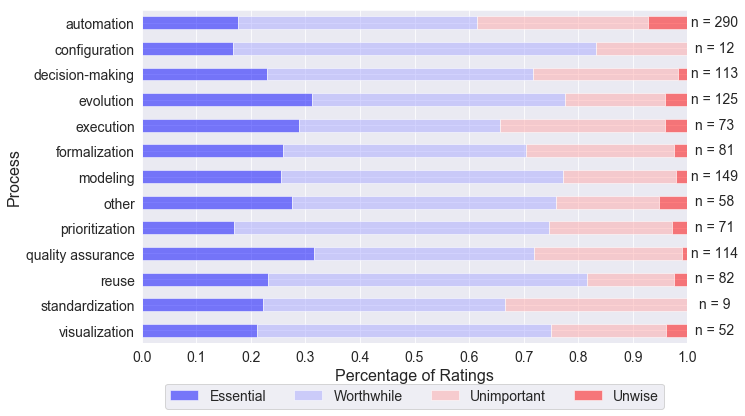

In [47]:
ratings_with_tags = dfdict['truth_ratings'].merge(reshaped, how='inner')
plot_df(ratings_with_tags, 'process', 'Process', absolute=False)
plt.rcParams['figure.figsize'] = 9, 9
plt.savefig("../plots/content_process.pdf")

#Calculate scores
scores_process=ratings_with_tags.groupby(['process'])['rating'].agg([np.size,e_score,ew_score,u_score])
scores_process["category"]="process"
scores_process

In [48]:
papercount_process=ratings_with_tags.groupby(['process'])['PaperID'].nunique()
papercount_process

#join both tables
stats_process=scores_process.merge(pd.DataFrame(papercount_process), left_index=True, right_index=True).rename(columns={'PaperID':'nr_Papers'})
stats_process

,size,e_score,ew_score,u_score,category,nr_Papers
process,,,,,,
automation,290,0.175862,0.613793,0.072414,process,56
configuration,12,0.166667,0.833333,0.000000,process,3
decision-making,113,0.230088,0.716814,0.017699,process,22
evolution,125,0.312000,0.776000,0.040000,process,21
execution,73,0.287671,0.657534,0.041096,process,14
formalization,81,0.259259,0.703704,0.024691,process,14
modeling,149,0.255034,0.771812,0.020134,process,35
other,58,0.275862,0.758621,0.051724,process,9
prioritization,71,0.169014,0.746479,0.028169,process,15


## Summary of important topics

In [49]:
scores = stats_doc.append(stats_people).append(stats_quality).append(stats_phase).append(stats_process).sort_values(by=['e_score','ew_score'], ascending=False)
unwise_scores = scores.sort_values(by=['u_score'],ascending=False)
display(scores.head(10),unwise_scores.head(5))

,size,e_score,ew_score,u_score,category,nr_Papers
general,37,0.432432,0.891892,0.000000,quality,8
subjectivity,19,0.421053,0.736842,0.052632,people,4
verifiability,5,0.400000,0.800000,0.000000,quality,1
scenarios,26,0.384615,0.807692,0.038462,documentation,5
other,14,0.357143,0.714286,0.071429,quality,3
other,38,0.342105,0.684211,0.052632,documentation,10
collaboration,83,0.337349,0.759036,0.048193,people,15
rules,3,0.333333,0.666667,0.000000,documentation,1
user story,18,0.333333,0.666667,0.000000,documentation,4
quality assurance,114,0.315789,0.719298,0.008772,process,26


,size,e_score,ew_score,u_score,category,nr_Papers
use case,53,0.245283,0.735849,0.113208,documentation,10
negotiation,19,0.157895,0.789474,0.105263,phase,4
necessity,10,0.200000,0.800000,0.100000,quality,3
creativity,44,0.159091,0.636364,0.090909,people,7
goal model,56,0.071429,0.642857,0.089286,documentation,11
